## Precios de Combustibles en Surtidor

El siguiente es un analisis sobre los precios de combustibles en argentina. Se realiza:

    - DATA CLEANING 
    - EDA
    - Comparativa entre los aumentos en el Gas Oil Grado 2 y el precio que deberia tener si los aumentos hubiesen seguido el ritmo del IPC, se analiza solo para el Gas Oil de grado 2  debido a la importancia que tiene este tipo de combustibles en la cadena logistica.
    
Datasets utilizados:

    - Precios en surtidor: https://datos.gob.ar/dataset/energia-precios-surtidor---resolucion-3142016/archivo/energia_80ac25de-a44a-4445-9215-090cf55cfda5
    - IPC: https://www.indec.gob.ar/ftp/cuadros/economia/sh_ipc_aperturas.xls

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from mpl_toolkits.basemap import Basemap

In [2]:
df=pd.read_csv("precios-en-surtidor-resolucin-3142016.csv")
df.tail(5)

,indice_tiempo,idempresa,cuit,empresa,direccion,localidad,provincia,region,idproducto,producto,idtipohorario,tipohorario,precio,fecha_vigencia,idempresabandera,empresabandera,latitud,longitud,geojson
36633,2021-02,7895,30-71221281-7,LIQUID GAS S.A,NaN,MORON,BUENOS AIRES,PAMPEANA,3,Nafta (premium) de más de 95 Ron,3,Nocturno,91.0,2021-02-15 00:00:00,2,YPF,-34.66054,-58.60785,"{""type"":""Point"",""coordinates"":[-58.60785,-34.6..."
36634,2021-02,7895,30-71221281-7,LIQUID GAS S.A,NaN,MORON,BUENOS AIRES,PAMPEANA,2,Nafta (súper) entre 92 y 95 Ron,2,Diurno,78.2,2021-02-15 00:00:00,2,YPF,-34.66054,-58.60785,"{""type"":""Point"",""coordinates"":[-58.60785,-34.6..."
36635,2021-02,7895,30-71221281-7,LIQUID GAS S.A,NaN,MORON,BUENOS AIRES,PAMPEANA,2,Nafta (súper) entre 92 y 95 Ron,3,Nocturno,78.2,2021-02-15 00:00:00,2,YPF,-34.66054,-58.60785,"{""type"":""Point"",""coordinates"":[-58.60785,-34.6..."
36636,2020-09,2243,30-53852511-8,ALFREDO BRUGNOLI E HIJOS S.C.C,NaN,CONCEPCION DEL BERMEJO,CHACO,NEA,2,Nafta (súper) entre 92 y 95 Ron,2,Diurno,65.2,2020-09-19 10:09:00,1,BLANCA,-26.60249,-60.95301,"{""type"":""Point"",""coordinates"":[-60.95301,-26.6..."
36637,2020-09,2243,30-53852511-8,ALFREDO BRUGNOLI E HIJOS S.C.C,NaN,CONCEPCION DEL BERMEJO,CHACO,NEA,2,Nafta (súper) entre 92 y 95 Ron,3,Nocturno,65.2,2020-09-19 10:09:00,1,BLANCA,-26.60249,-60.95301,"{""type"":""Point"",""coordinates"":[-60.95301,-26.6..."


In [3]:
print("El dataset importado tiene "+ str(np.shape(df)[0]) + " renglones y " + str(np.shape(df)[1]) + " columnas")

El dataset importado tiene 36638 renglones y 19 columnas


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36638 entries, 0 to 36637
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   indice_tiempo     36638 non-null  object 
 1   idempresa         36638 non-null  int64  
 2   cuit              36638 non-null  object 
 3   empresa           36638 non-null  object 
 4   direccion         36624 non-null  object 
 5   localidad         36638 non-null  object 
 6   provincia         36638 non-null  object 
 7   region            32603 non-null  object 
 8   idproducto        36638 non-null  int64  
 9   producto          36638 non-null  object 
 10  idtipohorario     36638 non-null  int64  
 11  tipohorario       36638 non-null  object 
 12  precio            36638 non-null  float64
 13  fecha_vigencia    36638 non-null  object 
 14  idempresabandera  36638 non-null  int64  
 15  empresabandera    36638 non-null  object 
 16  latitud           36450 non-null  float6

In [5]:
df.isnull().sum()

indice_tiempo          0
idempresa              0
cuit                   0
empresa                0
direccion             14
localidad              0
provincia              0
region              4035
idproducto             0
producto               0
idtipohorario          0
tipohorario            0
precio                 0
fecha_vigencia         0
idempresabandera       0
empresabandera         0
latitud              188
longitud             188
geojson              188
dtype: int64

In [6]:
columns_df = df.columns
for i in range(18):
        print('La columna '+ str(columns_df[i])+' tiene '+ str(len(df[columns_df[i]].unique()))+' valores distintos')
        print('Los valores son: \n'+str(df[columns_df[i]].unique())+'\n')

La columna indice_tiempo tiene 55 valores distintos
Los valores son: 
['2017-03' '2017-04' '2021-02' '2021-03' '2021-01' '2020-10' '2020-12'
 '2018-06' '2018-01' '2017-12' '2019-11' '2020-09' '2020-08' '2019-12'
 '2018-11' '2017-10' '2017-08' '2020-02' '2018-12' '2019-05' '2019-04'
 '2018-02' '2018-07' '2020-01' '2020-03' '2019-07' '2018-09' '2017-07'
 '2018-04' '2019-09' '2019-01' '2017-02' '2020-11' '2018-05' '2019-03'
 '2019-06' '2017-01' '2017-11' '2016-06' '2020-07' '2018-08' '2019-10'
 '2018-10' '2020-06' '2020-05' '2018-03' '2019-02' '2019-08' '2016-12'
 '2017-05' '2016-08' '2017-06' '2020-04' '2017-09' '2016-04']

La columna idempresa tiene 4729 valores distintos
Los valores son: 
[1376 8943 1284 ... 4097 7895 2243]

La columna cuit tiene 3274 valores distintos
Los valores son: 
['33-64337382-9' '30-71251168-7' '30-56342987-5' ... '33-70824089-9'
 '30-70795820-7' '30-71221281-7']

La columna empresa tiene 3587 valores distintos
Los valores son: 
['10 DE SETIEMBRE S.A.' '1913 SR

#### Nuestro Dataset tiene algunos valores Nans en la feature Region, pero como contamos con la feature provincia completa podemos completar las regiones faltantes.

In [7]:
regiones={
            'BUENOS AIRES' : "PAMPEANA",
            'CHUBUT' : "PATAGONIA",
            'SAN LUIS' : "CUYO",
            'SANTA FE' : "CENTRO",
            'ENTRE RIOS' : "CENTRO",
            'RIO NEGRO' : "PATAGONIA",
            'CHACO' : "NEA",
            'SANTIAGO DEL ESTERO' : "NOA",
            'MENDOZA' : "CUYO",
            'CATAMARCA' : "NOA",
            'CORDOBA' : "CENTRO",
            'SALTA' : "NOA",
            "MISIONES" : "NEA",
            'TUCUMAN' :"CUYO",
            'CORRIENTES' : "NEA",
            'LA PAMPA' : "PATAGONIA",
            'LA RIOJA' : "NOA",
            'CAPITAL FEDERAL' : "PAMPEANA",
            'SANTA CRUZ' : "PATAGONIA",
            'NEUQUEN' : "PATAGONIA",
            'JUJUY' : "NOA",
            'FORMOSA': "NEA",
            'SAN JUAN' : "CUYO",
            'TIERRA DEL FUEGO': "PATAGONIA"
            }

In [8]:
def regionalizacion(provincia):
   return regiones.get(provincia)

df["region"]=df["provincia"].apply(regionalizacion)

#### Ahora armamos tablas pivot para analizar cuales son las medias que tienen los precios de los combustibles en cada provincia, pero como nos interesa mas el analisis del precio del Gas Oil grado 2, debido a su papel en la cadena logistica solo mostraremos la tabla con dicho combustible 

In [9]:
df["indice_tiempo"]=pd.to_datetime(df["indice_tiempo"])
df.drop(df[df["precio"]>200].index, inplace=True)
dfhoy=df[df["indice_tiempo"]=="2021-02"]
dfhoyG2=dfhoy[dfhoy["producto"]=='Gas Oil Grado 2']
dfhoyG3=dfhoy[dfhoy["producto"]=='Gas Oil Grado 3']
dfhoyGNC=dfhoy[dfhoy["producto"]=='GNC']
dfhoyNS=dfhoy[dfhoy["producto"]=='Nafta (súper) entre 92 y 95 Ron']
dfhoyNP=dfhoy[dfhoy["producto"]=='Nafta (premium) de más de 95 Ron']

In [10]:
dfhoyG2.pivot_table(index="provincia", columns="empresabandera", values="precio", aggfunc="mean")

empresabandera,AGIRA,ASPRO,AXION,BLANCA,CIS,DAPSA S.A.,ESSO PETROLERA ARGENTINA S.R.L,GULF,OIL COMBUSTIBLES S.A.,PDV sur,PETROBRAS,PUMA,Pampa Energia,REFINOR,SHELL C.A.P.S.A.,SOL PETROLEO,VOY,YPF
provincia,,,,,,,,,,,,,,,,,,
BUENOS AIRES,77.0,78.083333,76.824273,76.711175,NaN,73.40,77.239114,74.781429,75.973889,76.3,77.049091,76.445254,NaN,NaN,77.993762,75.160000,NaN,75.597773
CAPITAL FEDERAL,NaN,NaN,72.227600,73.290000,NaN,70.45,72.933333,70.050000,71.063333,72.6,71.460000,71.800000,NaN,NaN,73.038085,NaN,NaN,70.350000
CATAMARCA,NaN,NaN,NaN,77.700000,NaN,NaN,79.066667,NaN,77.483333,NaN,76.800000,NaN,NaN,77.050000,78.500000,NaN,NaN,77.163636
CHACO,NaN,NaN,77.178000,76.556923,NaN,76.20,77.300000,NaN,76.700000,NaN,NaN,NaN,NaN,77.515000,77.626875,NaN,NaN,75.716129
CHUBUT,NaN,NaN,74.427143,77.500000,NaN,NaN,74.000000,NaN,NaN,NaN,73.791304,NaN,73.1,NaN,NaN,75.100000,NaN,72.177778
CORDOBA,NaN,NaN,76.802941,75.869773,NaN,75.89,76.833111,75.700000,76.442308,NaN,75.800000,76.397600,NaN,NaN,77.085789,79.990000,NaN,75.541040
CORRIENTES,NaN,NaN,77.650000,77.238333,NaN,NaN,77.523750,NaN,76.790000,NaN,NaN,76.090000,NaN,NaN,78.007647,NaN,NaN,75.610000
ENTRE RIOS,NaN,NaN,77.666667,76.867083,NaN,NaN,78.121111,NaN,77.080625,NaN,77.520000,76.554545,NaN,NaN,78.080526,76.133333,NaN,75.978182
FORMOSA,NaN,NaN,78.500000,78.595000,NaN,NaN,76.358000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.636000,NaN,NaN,75.450000


#### Estacion de servicio en la cual el precio del litro de combustible era el mas bajo de capital federal en Febrero de 2021

In [11]:
dfhoycaba=dfhoyG2[dfhoyG2["provincia"]=="CAPITAL FEDERAL"]
dfhoycaba.loc[dfhoycaba['precio'].idxmin()]

indice_tiempo                                     2021-02-01 00:00:00
idempresa                                                        2674
cuit                                                    30-63122550-7
empresa                                                   TOPEMA S.A.
direccion                                             CASEROS 1373/99
localidad                                             CAPITAL FEDERAL
provincia                                             CAPITAL FEDERAL
region                                                       PAMPEANA
idproducto                                                         19
producto                                              Gas Oil Grado 2
idtipohorario                                                       2
tipohorario                                                    Diurno
precio                                                          70.05
fecha_vigencia                                    2021-02-15 17:11:00
idempresabandera    

In [12]:
bandera_producto=dfhoy.pivot_table(columns="empresabandera", values="precio", index="producto", aggfunc="mean")

In [13]:
dfhoy.drop(["idempresa", "cuit", "direccion", "idproducto", "idtipohorario", "tipohorario", "idempresabandera", "fecha_vigencia"],axis=1, inplace=True)

C:\Users\Manuel\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


#### Ubicamos geografcamente los surtidores en un mapa utilizando Basemap, y ademas le agregamos un codigo de color para visualizar el precio que tiene el litro de Gas Oil.

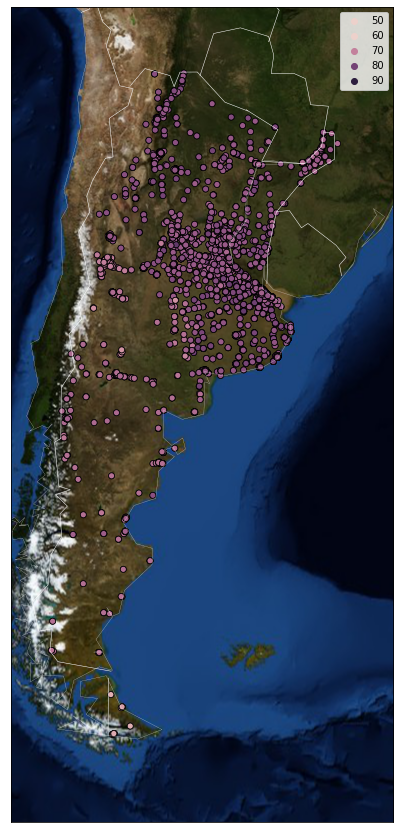

In [14]:
lats = dfhoyG2["latitud"].values.tolist()
lons = dfhoyG2["longitud"].values.tolist()
precio = dfhoyG2["precio"].values.tolist()

fig = plt.gcf()
fig.set_size_inches(20, 15)

m = Basemap(projection='merc', \
            llcrnrlat=-58, urcrnrlat=-18, \
            llcrnrlon=-75, urcrnrlon=-50, \
            lat_ts=20, \
            resolution="c"   )

m.bluemarble(scale=2)   
m.drawcoastlines(color='white', linewidth=0.2) 
m.drawcountries(color='white', linewidth=0.5)
x, y = m(lons,lats)


sns.scatterplot(x, y, hue=precio, edgecolor="Black") 

plt.show()

Podemos observar que en las provincias patagonicas el precio del litro de combustible es en general mas bajo que en el resto de las regiones, y en el NOA ocurre lo opuesto, alli el precio en surtidor es mas elevado. Las diferencias se deben principalmente a impuestos provinciales y a las distancias de los surtidores a los centros de extraccion nacionales.

(6787, 19)
(6787, 19)


C:\Users\Manuel\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


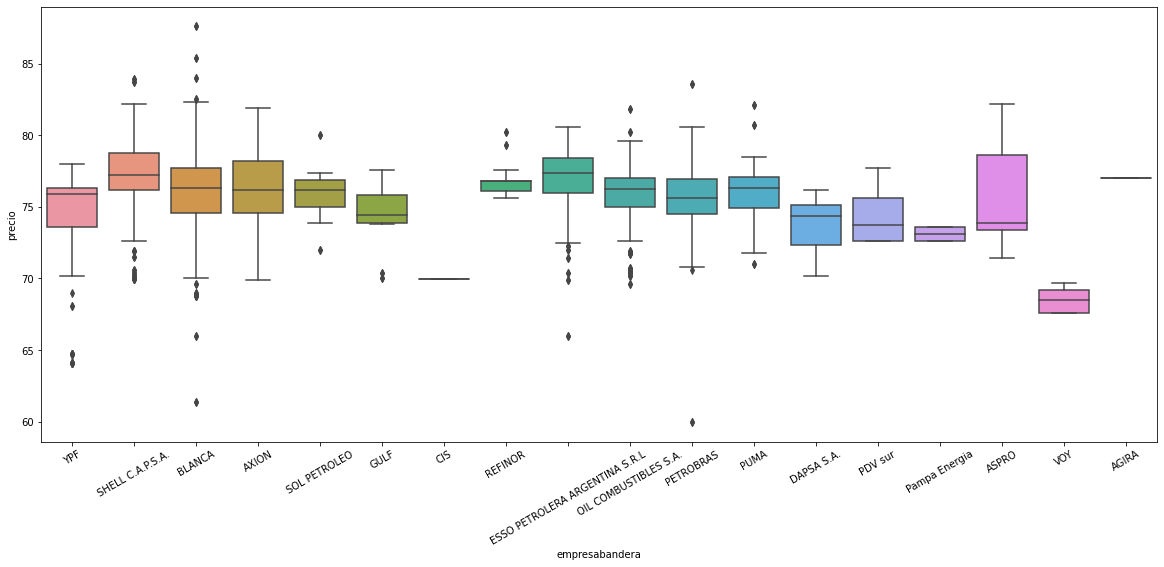

In [15]:
print(np.shape(dfhoyG2))
dfhoyG2.drop(dfhoyG2[dfhoyG2["precio"]>200].index, inplace=True)
print(np.shape(dfhoyG2))
plt.figure(figsize = (20,8))
ax=sns.boxplot(x=dfhoyG2["empresabandera"], y=dfhoyG2["precio"] )

plt.xticks(rotation=30)

plt.show()

#### Cantidad de Estaciones de Servicio por bandera 

<function matplotlib.pyplot.show(*args, **kw)>

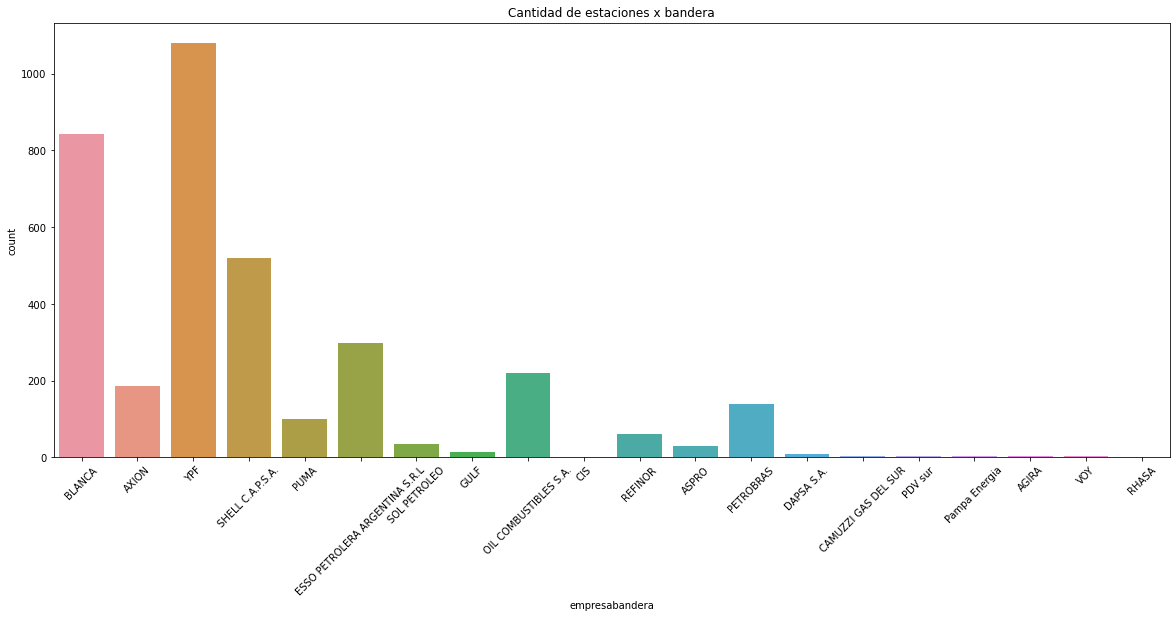

In [16]:
df_estaciones = df.loc[:,["cuit", "empresabandera"]]
df_estaciones = df_estaciones.drop_duplicates()

plt.figure(figsize = (20,8))
az = sns.countplot(x="empresabandera", data = df_estaciones)
plt.xticks(rotation=45)
plt.title("Cantidad de estaciones x bandera")
plt.show

In [17]:
df_estaciones['empresabandera'].value_counts()

YPF                               1079
BLANCA                             842
SHELL C.A.P.S.A.                   519
ESSO PETROLERA ARGENTINA S.R.L     297
OIL COMBUSTIBLES S.A.              219
AXION                              186
PETROBRAS                          139
PUMA                               100
REFINOR                             60
SOL PETROLEO                        34
ASPRO                               30
GULF                                13
DAPSA S.A.                          10
CAMUZZI GAS DEL SUR                  5
PDV sur                              4
VOY                                  4
AGIRA                                4
Pampa Energia                        3
RHASA                                2
CIS                                  1
Name: empresabandera, dtype: int64

#### Precio del litro de Gas Oli de grado 2 en las principales petroleras

In [18]:
G2=df[df["producto"]=="Gas Oil Grado 2"]
G2_periodo=pd.pivot_table(G2, values="precio", index=["indice_tiempo"], columns="empresabandera", aggfunc="mean")

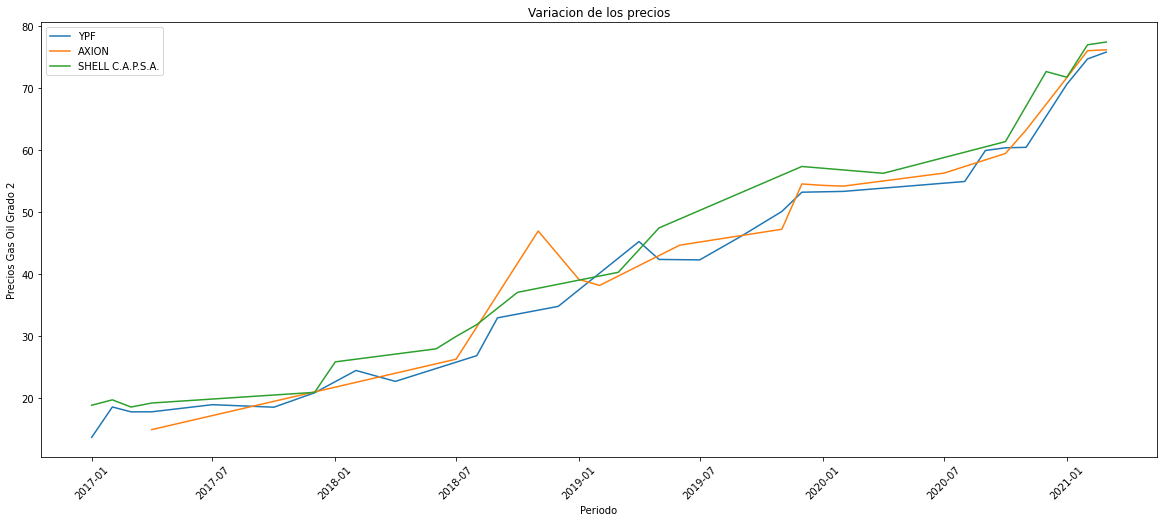

In [19]:
plt.figure(figsize = (20,8))

sns.lineplot(data=G2_periodo, x=G2_periodo.index, y=G2_periodo["YPF"],label="YPF" )
sns.lineplot(data=G2_periodo, x=G2_periodo.index, y=G2_periodo["AXION"], label="AXION")
sns.lineplot(data=G2_periodo, x=G2_periodo.index, y=G2_periodo["SHELL C.A.P.S.A."], label="SHELL C.A.P.S.A.")
#sns.lineplot(data=G2_periodo, x=G2_periodo.index, y=G2_periodo["ESSO PETROLERA ARGENTINA S.R.L"], label="ESSO PETROLERA ARGENTINA S.R.L")
#sns.lineplot(data=G2_periodo, x=G2_periodo.index, y=G2_periodo["OIL COMBUSTIBLES S.A."], label="OIL COMBUSTIBLES S.A.")
#sns.lineplot(data=G2_periodo, x=G2_periodo.index, y=G2_periodo["PETROBRAS"], label="PETROBRAS")
plt.xticks(rotation=45)
plt.title("Variacion de los precios")
plt.ylabel("Precios Gas Oil Grado 2") 
plt.legend()
plt.xlabel("Periodo")

plt.show()

#### Evolucion del precio de los distintos combustibles en las estaciones de YPF segun tipo de combustible

In [20]:
YPF=df[df["empresabandera"]=="YPF"]
G2_periodo_tipo=pd.pivot_table(YPF, values="precio", index=["indice_tiempo"], columns="producto", aggfunc="mean")
G2_periodo_tipo

producto,GNC,Gas Oil Grado 2,Gas Oil Grado 3,Nafta (premium) de más de 95 Ron,Nafta (súper) entre 92 y 95 Ron
indice_tiempo,,,,,
2016-06-01,11.940000,NaN,NaN,NaN,NaN
2016-08-01,10.680000,NaN,NaN,NaN,NaN
2017-01-01,11.001000,13.710000,NaN,NaN,NaN
2017-02-01,10.771500,18.611900,21.580000,23.250000,20.990000
2017-03-01,10.334778,17.822746,21.360000,22.990000,21.015000
2017-04-01,11.659900,17.831250,20.786667,20.930000,19.907500
2017-05-01,11.290000,NaN,NaN,NaN,NaN
2017-07-01,8.990000,18.983333,22.023333,24.755000,21.553333
2017-08-01,NaN,NaN,20.500000,NaN,NaN


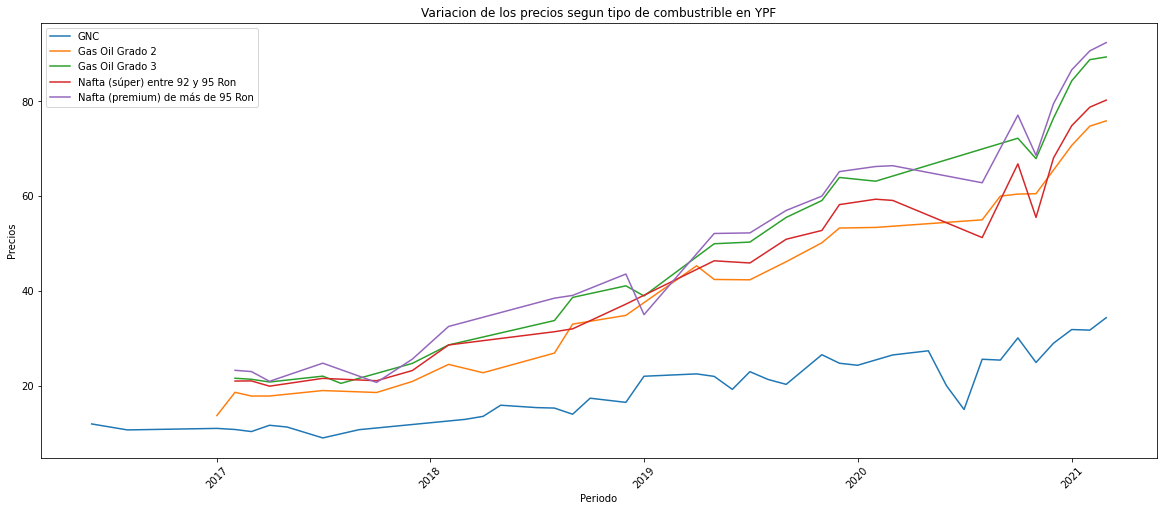

In [21]:
plt.figure(figsize = (20,8))

sns.lineplot(data=G2_periodo_tipo, x=G2_periodo_tipo.index, y=G2_periodo_tipo["GNC"],label="GNC" )
sns.lineplot(data=G2_periodo_tipo, x=G2_periodo_tipo.index, y=G2_periodo_tipo["Gas Oil Grado 2"],label="Gas Oil Grado 2" )
sns.lineplot(data=G2_periodo_tipo, x=G2_periodo_tipo.index, y=G2_periodo_tipo["Gas Oil Grado 3"],label="Gas Oil Grado 3" )
sns.lineplot(data=G2_periodo_tipo, x=G2_periodo_tipo.index, y=G2_periodo_tipo["Nafta (súper) entre 92 y 95 Ron"],label="Nafta (súper) entre 92 y 95 Ron" )
sns.lineplot(data=G2_periodo_tipo, x=G2_periodo_tipo.index, y=G2_periodo_tipo["Nafta (premium) de más de 95 Ron"],label="Nafta (premium) de más de 95 Ron" )

plt.xticks(rotation=45)
plt.title("Variacion de los precios segun tipo de combustrible en YPF")
plt.ylabel("Precios") 
plt.legend()
plt.xlabel("Periodo")

plt.show()

#### Comparativa entre evolucion del precio del combustible en estaciones de YPF y el precio que deberia tener si los aumentos hubiesen seguido el ritmo del IPC (BASE 2-2017)

In [22]:
IPC=pd.read_excel("sh_ipc_aperturas.xls", sheet_name="Variación mensual aperturas", header=5,)

fechas=list(IPC.columns)
fechas=fechas[1:]
inflacionIPC=list(IPC.iloc[2])
inflacionIPC=inflacionIPC[1:]
IPC=pd.DataFrame({
                    "fecha" : fechas,
                    "IPC" : inflacionIPC
                    })
IPC=IPC.set_index("fecha")

G2=df[df["producto"]=="Gas Oil Grado 2"]
G2_YPF=G2[G2["empresabandera"]=="YPF"]
G2_YPF_CABA=G2[G2["provincia"]=="CAPITAL FEDERAL"]
G2_YPF_CABA_periodo=pd.pivot_table(G2_YPF_CABA, values="precio", index=["indice_tiempo"], aggfunc="mean")

In [23]:
df2=[IPC , G2_YPF_CABA_periodo]
IPC_G2=pd.concat(df2, axis=1)
IPC_G2=IPC_G2.iloc[1:]
IPC_G2=pd.DataFrame.reset_index(IPC_G2)
IPC_G2.tail()

,index,IPC,precio
45,2020-11-01,3.0,NaN
46,2020-12-01,3.7,NaN
47,2021-01-01,3.3,71.520000
48,2021-02-01,3.6,71.589451
49,2021-03-01,NaN,72.966667


In [24]:
df2=[IPC , G2_YPF_CABA_periodo]
IPC_G2=pd.concat(df2, axis=1)
IPC_G2=IPC_G2.iloc[1:]
IPC_G2=pd.DataFrame.reset_index(IPC_G2)
IPC_G2.columns
#tomamos como base febrero 2017, que es nuesto primer de precio de combustible


base=1
for j in range(np.shape(IPC_G2)[0]):
    if base == 1 or base==np.nan:
        base=IPC_G2.at[j,"precio"]
        IPC_G2.at[j,"precio_IPC"]=base 
    else:
        base=base*((IPC_G2.at[j,"IPC"]/100)+1)
        IPC_G2.at[j,"precio_IPC"]=base


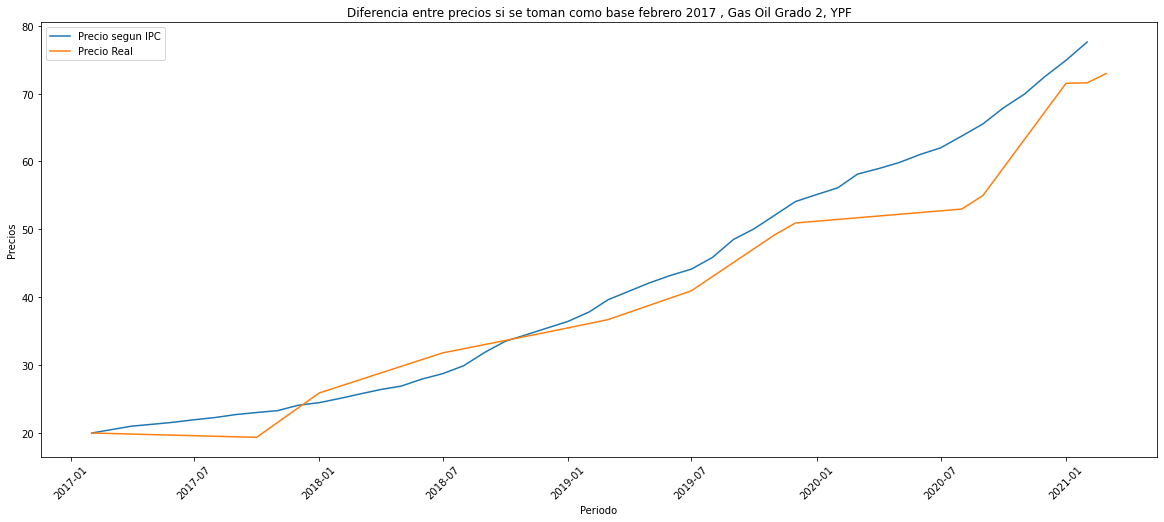

In [25]:
plt.figure(figsize = (20,8))

sns.lineplot(data=IPC_G2, x=IPC_G2["index"], y=IPC_G2["precio_IPC"], label="Precio segun IPC" )
sns.lineplot(data=IPC_G2, x=IPC_G2["index"], y=IPC_G2["precio"],label="Precio Real" )

plt.xticks(rotation=45)
plt.title("Diferencia entre precios si se toman como base febrero 2017 , Gas Oil Grado 2, YPF")
plt.ylabel("Precios") 
plt.legend()
plt.xlabel("Periodo")

plt.show()

Como se puede observar los aumentos del combustibles estan por debajo de los aumentos en el IPC